# Violation of Regression Models

When using a regression to fit a model to our data, the assumptions of regression analysis must be satisfied in order to ensure good parameter estimates and accurate fit statistics. We would like parameters to be:

- unbiased (expected value over different samples is the true value)
- consistent (converging to the true value with many samples), and
- efficient (minimized variance)

Below we investigate the ways in which these assumptions can be violated and the effect on the parameters and fit statistics. We'll be using single-variable linear equations for the examples, but the same considerations apply to other models. We'll also assume that our model is correctly specified; that is, that the functional form we chose is valid. We discuss model specification errors along with the assumption violations and other problems that they cause in another notebook.

## 1. Residuals

### Focusing on the Residuals

Rather than focusing on your model construction, it is possible to gain a huge amount of information from your residuals (errors). Your model may be incredibly complex and impossible to analyze, but as long as you have predictions and observed values, you can compute residuals. Once you have your residuals you can perform many statistical tests.

If your residuals do not follow a given distribution (usually normal, but depends on your model), then you know that something is wrong and you should be concerned with the accuracy of your predictions.

### Residuals no normally-distributed

If the error term is not normally distributed, then our tests of statistical significance will be off. Fortunately, the central limit theorem tells us that, for large enough data samples, the coefficient distributions will be close to normal even if the errors are not. Therefore our analysis will still be valid for large data datasets.

### Testing for Normality

A good test for normality is the Jarque-Bera test. It has a python implementation at $ statsmodels.stats.stattools.jarque\_bera  $, we will use it frequently in this notebook.

### Always test for normality!!

It's incredibly easy and can save you a ton of time.



In [22]:
# Importing the libraries:
import numpy as np
import statsmodels.api as sm
from statsmodels import regression, stats
import statsmodels
import matplotlib.pyplot as plt

# Let us also increase the size of the plot
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [29]:
# Let us make some fake residuals picked up from standard normal distribution:
residuals1 = np.random.normal(0,1,100)

# Now we run Jarque-Bera test on this:
jb_test1 = statsmodels.stats.stattools.jarque_bera(residuals1)
print(f"Test Statistic: {jb_test1[0]}")
print(f"p-Value: {jb_test1[1]}")
print(f"Skewness: {jb_test1[2]}")
print(f"Kurtosis: {jb_test1[3]}")

Test Statistic: 0.023496288691777046
p-Value: 0.9883205956494355
Skewness: -0.016551800559867064
Kurtosis: 3.0674037156166634


In [28]:
# now let us run the Jarque-Bera test on residuals picked up from Poisson Distribution and not Normal Distribution:
residuals2 = np.random.poisson(size=100)

# Now we run Jarque-Bera test on this:
jb_test2 = statsmodels.stats.stattools.jarque_bera(residuals2)
print(f"Test Statistic: {jb_test2[0]}")
print(f"p-Value: {jb_test2[1]}")
print(f"Skewness: {jb_test2[2]}")
print(f"Kurtosis: {jb_test2[3]}")

Test Statistic: 24.636676285704755
p-Value: 4.469034613256684e-06
Skewness: 1.1126123243265766
Kurtosis: 3.9803966399348742


1. If the p-value > 0.05, then the distribution is normally distributed.
2. If the p-value < 0.05, then the distribution is not normally distributed.

## 2. Heteroskedasticity

Heteroskedasticity means that the variance of the error terms is not constant across observations. Intuitively, this means that the observations are not uniformly distributed along the regression line. It often occurs in cross-sectional data where the differences in the samples we are measuring lead to differences in the variance.

In [17]:
# Let us create a fake dataset:
x = np.arange(100)
y = x + 3*np.random.randn(100)

# Now we run linear regression on these variables:
slr1 = regression.linear_model.OLS(y, sm.add_constant(x)).fit()

# We get the estimated parameters of the regression:
print(f"alpha: {slr1.params[0]}")
print(f"beta: {slr1.params[1]}")

# we get the predicted line:
predicted = slr1.params[0] + slr1.params[1]*x

alpha: 0.3154639606136329
beta: 0.9906800546576551


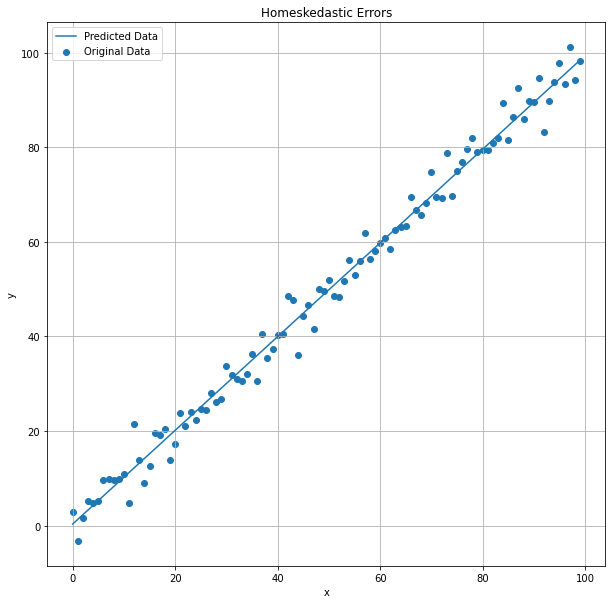

In [23]:
# And now we plot the data and the regression line:
plt.scatter(x,y, label="Original Data")
plt.plot(x, predicted, label="Predicted Data")
plt.title("Homeskedastic Errors")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend();

Here, we see that the observed values are very nicely distributed along the fitted line and do not seem to change much with x. Let us see a counterexample of this:


In [31]:
# Let us create a fake dataset:
x2 = np.arange(100)
y2 = x2*(1 + 0.5*np.random.randn(100))

# Now we run linear regression on these variables:
slr2 = regression.linear_model.OLS(y2, sm.add_constant(x2)).fit()

# We get the estimated parameters of the regression:
print(f"alpha: {slr2.params[0]}")
print(f"beta: {slr2.params[1]}")

# we get the predicted line:
predicted2 = slr2.params[0] + slr2.params[1]*x2

alpha: -8.015637409503368
beta: 1.2736621253906553


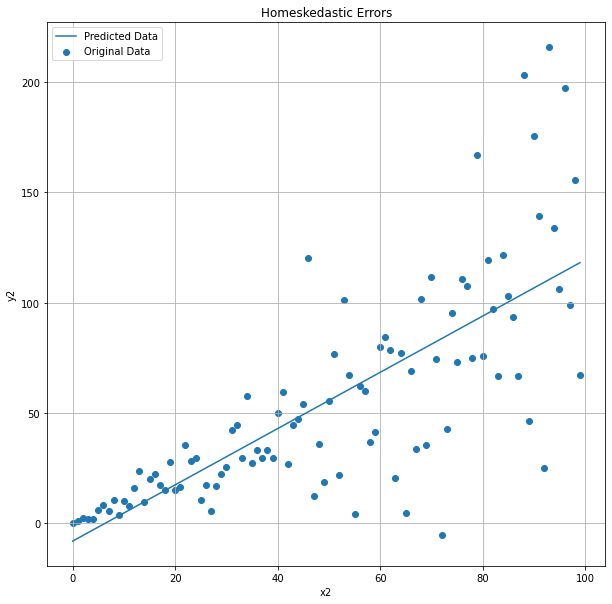

In [32]:
# And now we plot the data and the regression line:
plt.scatter(x2,y2, label="Original Data")
plt.plot(x2, predicted2, label="Predicted Data")
plt.title("Homeskedastic Errors")
plt.xlabel("x2")
plt.ylabel("y2")
plt.grid()
plt.legend();

This graph looks like a mess! And hence we say that there is a lot of heteroskedasticity in this model. And we see a peculiar thing that as x is increasing, the magnitude of "error" is also increasing. Hence, the errors seem to be dependent on the independent variable x somehow and this can be a big problem! But as always, we can never rely on visual aid and we always need some test to verify our assumption.

### Testing for Heteroskedasticity

You can test for heteroskedasticity using a few tests, we'll use the Breush Pagan test from the statsmodels library. We'll also test for normality, which in this case also picks up the weirdness in the second case. HOWEVER, it is possible to have normally distributed residuals which are also heteroskedastic, so both tests must be performed to be sure.

In [35]:
# First of all, let us calculate the error terms in both the cases:
residuals1 = y-predicted
residuals2 = y2-predicted2

In [37]:
# let us do the Jarque-Bera test for normality of the residuals:
jb1 = statsmodels.stats.stattools.jarque_bera(residuals1)
jb2 = statsmodels.stats.stattools.jarque_bera(residuals2)
print(f"p-value in Case 1: {jb1[1]}")
print(f"p-value in Case 2: {jb2[1]}")


p-value in Case 1: 0.6852622982309683
p-value in Case 1: 2.2132402509493076e-05


Hence, we see that p-value in the first case > 0.05 and hence the residuals are normally distributed. The same is not true for the second case.

In [38]:
# Now, let us do the Breusch-Pagan Test:
bp1 = stats.diagnostic.het_breuschpagan(residuals1, sm.add_constant(x))
bp2 = stats.diagnostic.het_breuschpagan(residuals2, sm.add_constant(x2))
print(f"p-value in Case 1: {bp1[1]}")
print(f"p-value in Case 1: {bp2[1]}")

p-value in Case 1: 0.9938084509461425
p-value in Case 1: 4.503824828876284e-06


Again, we see that the first case has p-value > 0.05 and hence means we accept null hypothesis. The Null Hypothesis of Breusch-Pagan test says that the error variances are all equal. This means no heteroskadasticity! So, the first case has no heteroskedasticity while the second case does show heteroskedasticity. 

This was confirmed by the visual test and also the test for normality coincidentally!

### Correcting for Heteroskedasticity

How does heteroskedasticity affect our analysis? The problematic situation, known as conditional heteroskedasticity, is when the error variance is correlated with the independent variables as it is above. This makes the F-test for regression significance and t-tests for the significances of individual coefficients unreliable. Most often this results in overestimation of the significance of the fit.

The Breusch-Pagan test and the White test can be used to detect conditional heteroskedasticity. If we suspect that this effect is present, we can alter our model to try and correct for it. One method is generalized least squares, which requires a manual alteration of the original equation. Another is computing robust standard errors, which corrects the fit statistics to account for the heteroskedasticity. statsmodels can compute robust standard errors; note the difference in the statistics below.

In [39]:
# Let us see the summary of the model which contained heteroskedasticity:
print(slr2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     128.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.64e-19
Time:                        17:21:48   Log-Likelihood:                -488.88
No. Observations:                 100   AIC:                             981.8
Df Residuals:                      98   BIC:                             987.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0156      6.443     -1.244      0.2

In [40]:
# And now we computer the robust standard errors:
print(slr2.get_robustcov_results().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     98.69
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           1.68e-16
Time:                        17:22:29   Log-Likelihood:                -488.88
No. Observations:                 100   AIC:                             981.8
Df Residuals:                      98   BIC:                             987.0
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0156      4.131     -1.941      0.0

## 3. Serial Correlation of Errors (Autocorrelation)

A common and serious problem is when errors are correlated across observations (known serial correlation or autocorrelation). This can occur, for instance, when some of the data points are related, or when we use time-series data with periodic fluctuations. If one of the independent variables depends on previous values of the dependent variable - such as when it is equal to the value of the dependent variable in the previous period - or if incorrect model specification leads to autocorrelation, then the coefficient estimates will be inconsistent and therefore invalid. Otherwise, the parameter estimates will be valid, but the fit statistics will be off. For instance, if the correlation is positive, we will have inflated F- and t-statistics, leading us to overestimate the significance of the model.

If the errors are homoskedastic, we can test for autocorrelation using the Durbin-Watson test, which is conveniently reported in the regression summary in statsmodels.

In [42]:
# Let us test it on real data:

import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2014,1,1)
end = dt.datetime(2015,1,1)

y =  web.DataReader('DAL', "yahoo", start, end)['Adj Close']
x = np.arange(len(y))

In [45]:
# now, we run the pricing data against time:
model = regression.linear_model.OLS(y, sm.add_constant(x)).fit()

In [46]:
# we get the estimated parameters:
alpha = model.params[0]
beta = model.params[1]

In [47]:
# We construct the fit line i.e. calculate the predicted:
predicted = alpha + beta*x

Text(0, 0.5, 'Prices')

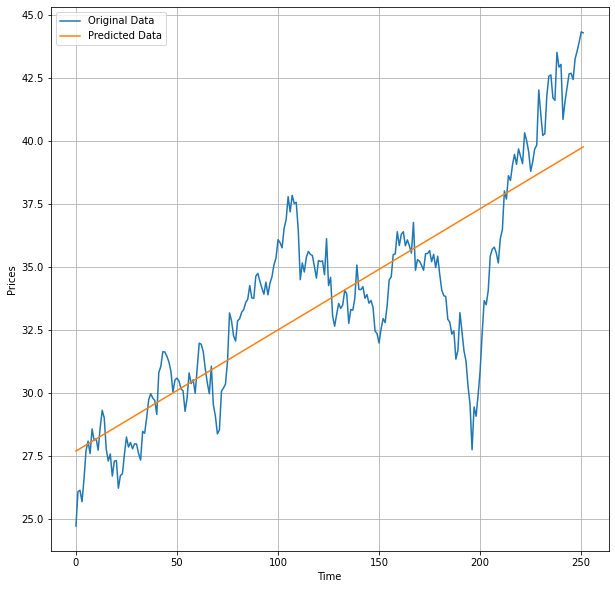

In [48]:
# Now we plot the pricing data and regression line:
plt.plot(x,y, label='Original Data') # original data
plt.plot(x, predicted, label='Predicted Data')
plt.legend()
plt.grid()
plt.xlabel("Time")
plt.ylabel("Prices")

In [49]:
# summary of the regression results:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     507.7
Date:                Wed, 02 Jun 2021   Prob (F-statistic):           3.93e-62
Time:                        17:30:18   Log-Likelihood:                -583.53
No. Observations:                 252   AIC:                             1171.
Df Residuals:                     250   BIC:                             1178.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.7028      0.309     89.609      0.000      27.094      28.312
x1             0.0480      0.002     22.532      0.000       0.044       0.052
==============================================================================
Omnibus:                       30.510   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.725
Skew:                          -0.750   Prob(JB):                     1.94e-10
Kurtosis:                       4.418   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is a clearly autocorrelated series! How do we know that? Because they tend to be spiky. 

### Testing for Autocorrelation

We can test for autocorrelation in both our prices and residuals. We'll use the built-in method to do this, which is based on the Ljun-Box test. This test computes the probability that the n-th lagged datapoint is predictive of the current. If no max lag is given, then the function computes a max lag and returns the p-values for all lags up to that one. We can see here that for the 5 most recent datapoints, a significant correlation exists with the current. Therefore we conclude that both the data is autocorrelated.



In [50]:
residuals = y-predicted

acf_y = statsmodels.tsa.stattools.acf(y, qstat=True)
acf_predicted = statsmodels.tsa.stattools.acf(residuals, qstat=True)

print(f"Prices Autocorrelation p-values: {acf_y[2]}")
print(f"Residuals Autocorrelation p-values: {acf_predicted[2]}")

Prices Autocorrelation p-values: [1.40792938e-053 8.18618044e-101 5.25054484e-145 2.10707346e-186
 3.60862025e-225 1.93187899e-261 2.00454078e-295 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
Residuals Autocorrelation p-values: [8.84141541e-052 5.65423363e-096 9.55007546e-136 8.25142736e-172
 3.49579240e-204 1.31969078e-232 1.14552361e-257 9.32283140e-280
 1.87497482e-299 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.0

C:\Users\Siddhartha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Siddhartha\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


### Newey-Test

Newey-West is a method of computing variance which accounts for autocorrelation. A naive variance computation will actually produce inaccurate standard errors with the presence of autocorrelation.

We can attempt to change the regression equation to eliminate serial correlation. A simpler fix is adjusting the standard errors using an appropriate method and using the adjusted values to check for significance. Below we use the Newey-West method from statsmodels to compute adjusted standard errors for the coefficients. They are higher than those originally reported by the regression, which is what we expected for positively correlated errors.

In [52]:
from math import sqrt

# Find the covariance matrix of the coefficients
cov_mat = stats.sandwich_covariance.cov_hac(model)
print(cov_mat)

[[ 2.07546100e-01 -1.72116848e-03]
 [-1.72116848e-03  2.12946504e-05]]


In [54]:
# Print the standard errors of each coefficient from the original model and from the adjustment
print (f'Old standard errors:{model.bse[0]}, {model.bse[1]}')
print (f'Adjusted standard errors:{sqrt(cov_mat[0,0])}, {sqrt(cov_mat[1,1])}')

Old standard errors:0.30915291821238744, 0.0021312192108621794
Adjusted standard errors:0.45557227783209386, 0.004614612705214366


## 4. Multicollinearity

When using multiple independent variables, it is important to check for multicollinearity; that is, an approximate linear relation between the independent variables, such as$$ X_2 \approx 5 X_1 - X_3 + 4.5 $$

With multicollinearity, it is difficult to identify the independent effect of each variable, since we can change around the coefficients according to the linear relation without changing the model. As with truly unnecessary variables, this will usually not hurt the accuracy of the model, but will cloud our analysis. In particular, the estimated coefficients will have large standard errors. The coefficients will also no longer represent the partial effect of each variable, since with multicollinearity we cannot change one variable while holding the others constant.

High correlation between independent variables is indicative of multicollinearity. However, it is not enough, since we would want to detect correlation between one of the variables and a linear combination of the other variables. If we have high R-squared but low t-statistics on the coefficients (the fit is good but the coefficients are not estimated precisely) we may suspect multicollinearity. To resolve the problem, we can drop one of the independent variables involved in the linear relation.

For instance, using two stock indices as our independent variables is likely to lead to multicollinearity. Below we can see that removing one of them improves the t-statistics without hurting R-squared.

Another important thing to determine here is which variable may be the casual one. If we hypothesize that the market influences both MDY and HPQ, then the market is the variable that we should use in our predictive model.

In [55]:
# Let us load the data for the two stocks:

import pandas_datareader.data as web
import datetime as dt

start = dt.datetime(2014,1,1)
end = dt.datetime(2015,1,1)

b1 =  web.DataReader('SPY', "yahoo", start, end)['Adj Close']
b2 =  web.DataReader('MDY', "yahoo", start, end)['Adj Close']
a = web.DataReader('HPQ', "yahoo", start, end)['Adj Close']

In [57]:
# Now, we run multiple linear regression making "a" i.e. HPQ as the dependent variable:
mlr = regression.linear_model.OLS(a, sm.add_constant(np.column_stack((b1, b2)))).fit()

In [59]:
# we obtain the estimated parameters:
alpha = mlr.params[0]
beta1 = mlr.params[1]
beta2 = mlr.params[2]

In [61]:
# we get the predicted line:
predicted1 = alpha + beta1*b1 + beta2*b2

In [62]:
# We get the summary of the model:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     1162.
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          5.19e-127
Time:                        17:53:36   Log-Likelihood:                -114.66
No. Observations:                 252   AIC:                             235.3
Df Residuals:                     249   BIC:                             245.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.6771      0.821    -11.782      0.000     -11.295      -8.059
x1             0.1791      0.008     23.781      0.000       0.164       0.194
x2            -0.0351      0.008     -4.502      0.000      -0.050      -0.020
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.599
Skew:                          -0.000   Prob(JB):                        0.450
Kurtosis:                       2.610   Cond. No.                     9.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# We can also get regression statistics individually:
print(f"Adjusted R-Squared: {mlr.rsquared_adj}")
print(f"t-Statistics: {mlr.tvalues}")

Adjusted R-Squared: 0.9024693165046033
t-Statistics: const   -11.782168
x1       23.780528
x2       -4.501924
dtype: float64


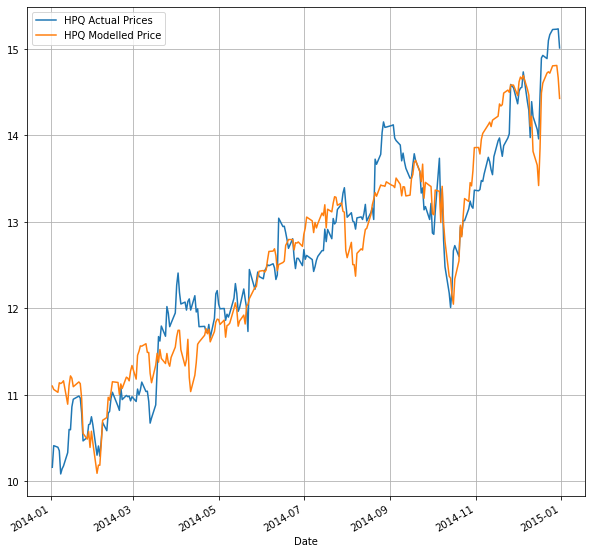

In [66]:
# Plotting the result:
a.plot(label="HPQ Actual Prices")
predicted1.plot(label="HPQ Modelled Price")
plt.legend()
plt.grid()
plt.show();

Adjusted R-Squared: 0.8949526986217086
t-Statistics: const       -23.071549
Adj Close    46.253646
dtype: float64


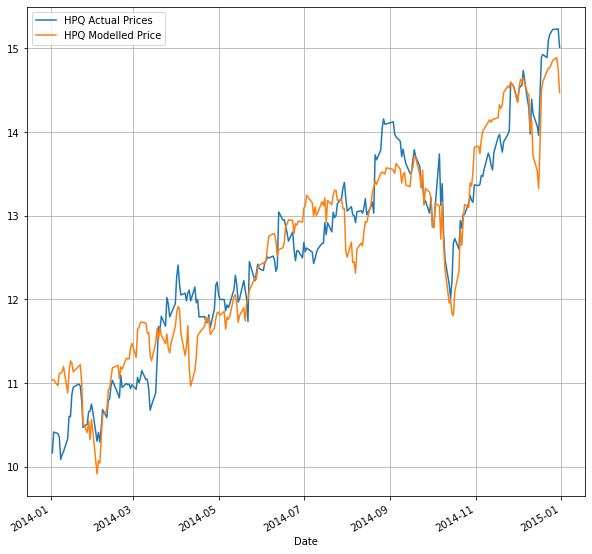

In [67]:
# Now, we throw one variable away and will perform linear regression  (with b1 i.e. S&P 500):
slr = regression.linear_model.OLS(a, sm.add_constant(b1)).fit()

# we obtain the estimated parameters:
alpha = slr.params[0]
beta = slr.params[1]

# we get the predicted line:
predicted2 = alpha + beta*b1 

# We get the summary of the model:
# slr.summary()

# We can also get regression statistics individually:
print(f"Adjusted R-Squared: {slr.rsquared_adj}")
print(f"t-Statistics: {slr.tvalues}")

# Plotting the result:
a.plot(label="HPQ Actual Prices")
predicted2.plot(label="HPQ Modelled Price")
plt.legend()
plt.grid()
plt.show();